In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

pd.set_option('display.max_rows', 111)
pd.set_option('display.max_columns', 111)

data = pd.read_csv('../data/cleaned/clean_poems.csv')

In [2]:
data.head()


,title,author,lines,linecount,text,clean_text,lemmatized,word_count,line_count
0,A Song of Autumn,Adam Lindsay Gordon,"['‘WHERE shall we go for our garlands glad', '...",16,‘WHERE shall we go for our garlands glad At th...,where shall we go for our garlands glad at the...,shall go garland glad falling year burn bank y...,121,1
1,An Exile's Farewell,Adam Lindsay Gordon,"['The ocean heaves around us still', 'With lon...",56,The ocean heaves around us still With long and...,the ocean heaves around us still with long and...,ocean heave around still long measure swell au...,314,1
2,I Have A Rendezvous With Death,Alan Seeger,"['I have a rendezvous with Death', 'At some di...",24,I have a rendezvous with Death At some dispute...,i have a rendezvous with death at some dispute...,I rendezvous death dispute barricade spring co...,158,1
3,Ode in Memory of the American Volunteers Falle...,Alan Seeger,"['I', '', 'Ay, it is fitting on this holiday,'...",104,"I Ay, it is fitting on this holiday, Commemor...",i ay it is fitting on this holiday commemorati...,I ay fitting holiday commemorative soldier dea...,737,1
4,Fragments,Alan Seeger,"['In that fair capital where Pleasure, crowned...",83,"In that fair capital where Pleasure, crowned A...",in that fair capital where pleasure crowned am...,fair capital pleasure crown amidst myriad cour...,611,1


In [5]:
# Supprimer les colonnes non pertinentes
data = data.drop(columns=['author', 'linecount', 'line_count', 'word_count','lines','text'], errors='ignore')

# Vérifier le résultat
data.head()


,title,clean_text,lemmatized
0,A Song of Autumn,where shall we go for our garlands glad at the...,shall go garland glad falling year burn bank y...
1,An Exile's Farewell,the ocean heaves around us still with long and...,ocean heave around still long measure swell au...
2,I Have A Rendezvous With Death,i have a rendezvous with death at some dispute...,I rendezvous death dispute barricade spring co...
3,Ode in Memory of the American Volunteers Falle...,i ay it is fitting on this holiday commemorati...,I ay fitting holiday commemorative soldier dea...
4,Fragments,in that fair capital where pleasure crowned am...,fair capital pleasure crown amidst myriad cour...


In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Télécharger les stopwords si nécessaire
nltk.download('stopwords')

# Stopwords standards + tes stopwords personnalisés
extra_stop = {"thy","thou","thee","ye","like","one","would","could","must","er"}
stop_eng = set(stopwords.words("english"))
STOPWORDS = stop_eng.union(extra_stop)

# Fonction de nettoyage (minuscules + suppression stopwords)
def clean_tokens(text):
    tokens = str(text).lower().split()
    tokens = [t for t in tokens if t not in STOPWORDS]
    return " ".join(tokens)

# Appliquer sur tes colonnes pertinentes
data['title_clean'] = data['title'].apply(clean_tokens)
data['text_clean'] = data['clean_text'].apply(clean_tokens)

# Vérifier le résultat
data[['title_clean','text_clean']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title_clean,text_clean
0,song autumn,shall go garlands glad falling year burnt bank...
1,exile's farewell,ocean heaves around us still long measured swe...
2,rendezvous death,rendezvous death disputed barricade spring com...
3,ode memory american volunteers fallen france,ay fitting holiday commemorative soldier dead ...
4,fragments,fair capital pleasure crowned amidst myriad co...


In [7]:
data.head

,title,clean_text,lemmatized,title_clean,text_clean
0,A Song of Autumn,where shall we go for our garlands glad at the...,shall go garland glad falling year burn bank y...,song autumn,shall go garlands glad falling year burnt bank...
1,An Exile's Farewell,the ocean heaves around us still with long and...,ocean heave around still long measure swell au...,exile's farewell,ocean heaves around us still long measured swe...
2,I Have A Rendezvous With Death,i have a rendezvous with death at some dispute...,I rendezvous death dispute barricade spring co...,rendezvous death,rendezvous death disputed barricade spring com...
3,Ode in Memory of the American Volunteers Falle...,i ay it is fitting on this holiday commemorati...,I ay fitting holiday commemorative soldier dea...,ode memory american volunteers fallen france,ay fitting holiday commemorative soldier dead ...
4,Fragments,in that fair capital where pleasure crowned am...,fair capital pleasure crown amidst myriad cour...,fragments,fair capital pleasure crowned amidst myriad co...


In [9]:
import json

# Charger le fichier JSON
with open("../data/lexic/lexicons.json", "r", encoding="utf-8") as f:
    lexicons = json.load(f)

# Vérifier le contenu
print(lexicons.keys())   # Liste des thèmes disponibles
print(lexicons["love_romantic"]["core_words"])  # Exemple d'accès

dict_keys(['love_romantic', 'melancholy_nostalgia', 'death_mortality', 'time_transience', 'nature_sublime', 'passion_erotic', 'solitude_exile', 'joy_ecstasy', 'spirituality_devotion'])
['love', 'lover', 'heart', 'flame', 'fire', 'rose', 'beauty', 'dear', 'sweet', 'kiss', 'embrace', 'soul', 'desire', 'passion']


In [10]:
theme_words = {
    theme: info["core_words"] + info["extended_words"]
    for theme, info in lexicons.items()
}


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Créer un corpus des lexiques
lex_corpus = [" ".join(words) for words in theme_words.values()]

vectorizer = TfidfVectorizer()
lex_vectors = vectorizer.fit_transform(lex_corpus)

# Associer chaque vecteur à son thème
theme_vectors = dict(zip(theme_words.keys(), lex_vectors))


In [12]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

poem_vectors = vectorizer.transform(data['clean_text'])
similarities = cosine_similarity(poem_vectors, lex_vectors)

# Trouver le thème le plus proche pour chaque poème
closest_theme = [list(theme_words.keys())[i] for i in np.argmax(similarities, axis=1)]
data['predicted_theme'] = closest_theme


In [13]:
data.head()

,title,clean_text,lemmatized,title_clean,text_clean,predicted_theme
0,A Song of Autumn,where shall we go for our garlands glad at the...,shall go garland glad falling year burn bank y...,song autumn,shall go garlands glad falling year burnt bank...,solitude_exile
1,An Exile's Farewell,the ocean heaves around us still with long and...,ocean heave around still long measure swell au...,exile's farewell,ocean heaves around us still long measured swe...,nature_sublime
2,I Have A Rendezvous With Death,i have a rendezvous with death at some dispute...,I rendezvous death dispute barricade spring co...,rendezvous death,rendezvous death disputed barricade spring com...,death_mortality
3,Ode in Memory of the American Volunteers Falle...,i ay it is fitting on this holiday commemorati...,I ay fitting holiday commemorative soldier dea...,ode memory american volunteers fallen france,ay fitting holiday commemorative soldier dead ...,nature_sublime
4,Fragments,in that fair capital where pleasure crowned am...,fair capital pleasure crown amidst myriad cour...,fragments,fair capital pleasure crowned amidst myriad co...,love_romantic


In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectoriser les titres
vectorizer_title = TfidfVectorizer(max_features=3000)
X_title = vectorizer_title.fit_transform(data['title_clean'])

# Vectoriser les textes
vectorizer_text = TfidfVectorizer(max_features=5000)
X_text = vectorizer_text.fit_transform(data['text_clean'])


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectoriser les titres
vectorizer_title = TfidfVectorizer(max_features=2000)
X_title = vectorizer_title.fit_transform(data['title_clean'])

# Vectoriser les textes
vectorizer_text = TfidfVectorizer(max_features=5000)
X_text = vectorizer_text.fit_transform(data['text_clean'])



In [20]:
from scipy.sparse import hstack

X_combined = hstack([0.4 * X_title, 0.6 * X_text])

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Choisir un nombre de clusters
k = 8
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(X_combined)

# Évaluer la qualité
score = silhouette_score(X_combined, data['cluster'])
print(f"Silhouette score: {score:.2f}")


Silhouette score: -0.01


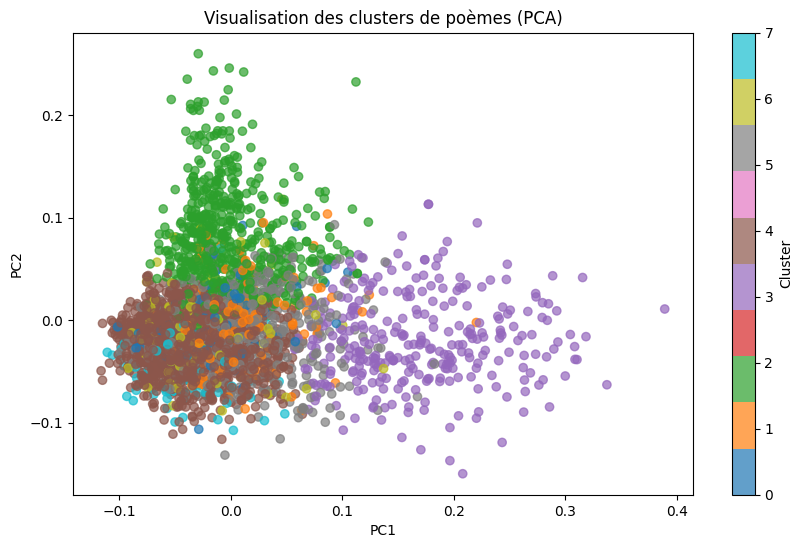

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Réduction dimensionnelle
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_combined.toarray())

# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=data['cluster'], cmap='tab10', alpha=0.7)
plt.title("Visualisation des clusters de poèmes (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()


In [23]:
import json

with open("../data/lexic/lexicons.json", "r", encoding="utf-8") as f:
    lexicons = json.load(f)

# Fusionner core_words + extended_words pour chaque thème
theme_words = {
    theme: info["core_words"] + info["extended_words"]
    for theme, info in lexicons.items()
}

In [24]:
# Créer un corpus des lexiques
lex_corpus = [" ".join(words) for words in theme_words.values()]

# Transformer avec le même vectorizer que les poèmes
lex_vectors = vectorizer_text.transform(lex_corpus)

# Associer chaque vecteur à son thème
theme_vectors = dict(zip(theme_words.keys(), lex_vectors))


In [25]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Centres des clusters
cluster_centers = kmeans.cluster_centers_

# Similarité entre chaque cluster et chaque lexique
for i in range(k):
    sims = {}
    for theme, vec in theme_vectors.items():
        sims[theme] = cosine_similarity(cluster_centers[i].reshape(1,-1), vec).mean()
    # Trier par similarité décroissante
    sims_sorted = sorted(sims.items(), key=lambda x: x[1], reverse=True)
    print(f"\nCluster {i} correspond le plus à : {sims_sorted[0][0]} (score={sims_sorted[0][1]:.3f})")
    print("Top 3 thèmes :", sims_sorted[:3])


ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 7000 while Y.shape[1] == 5000

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics.pairwise import cosine_similarity
import json


In [28]:
with open("../data/lexic/lexicons.json", "r", encoding="utf-8") as f:
    lexicons = json.load(f)

theme_words = {
    theme: info["core_words"] + info["extended_words"]
    for theme, info in lexicons.items()
}
lex_corpus = [" ".join(words) for words in theme_words.values()]

In [29]:
def combine_title_text(df):
    return (0.4 * df['title_clean'] + " " + 0.6 * df['text_clean']).tolist()


In [30]:
# Transformer pour combiner titre et texte
combine_transformer = FunctionTransformer(combine_title_text, validate=False)

# Vectorizer TF-IDF
vectorizer = TfidfVectorizer(max_features=7000)

# Clustering KMeans
kmeans = KMeans(n_clusters=8, random_state=42)

# Pipeline complet
pipeline = make_pipeline(combine_transformer, vectorizer, kmeans)


In [31]:
X_combined = vectorizer.fit_transform(combine_title_text(data))
data['cluster'] = kmeans.fit_predict(X_combined)

score = silhouette_score(X_combined, data['cluster'])
print(f"Silhouette score: {score:.2f}")


TypeError: can't multiply sequence by non-int of type 'float'

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorisation séparée
vectorizer_title = TfidfVectorizer(max_features=2000)
X_title = vectorizer_title.fit_transform(data['title_clean'])

vectorizer_text = TfidfVectorizer(max_features=5000)
X_text = vectorizer_text.fit_transform(data['text_clean'])
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorisation séparée
vectorizer_title = TfidfVectorizer(max_features=2000)
X_title = vectorizer_title.fit_transform(data['title_clean'])

vectorizer_text = TfidfVectorizer(max_features=5000)
X_text = vectorizer_text.fit_transform(data['text_clean'])


In [33]:
from scipy.sparse import hstack

# Pondération 40% titre, 60% texte
X_combined = hstack([0.4 * X_title, 0.6 * X_text])


In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 8
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(X_combined)

score = silhouette_score(X_combined, data['cluster'])
print(f"Silhouette score: {score:.2f}")


Silhouette score: -0.01


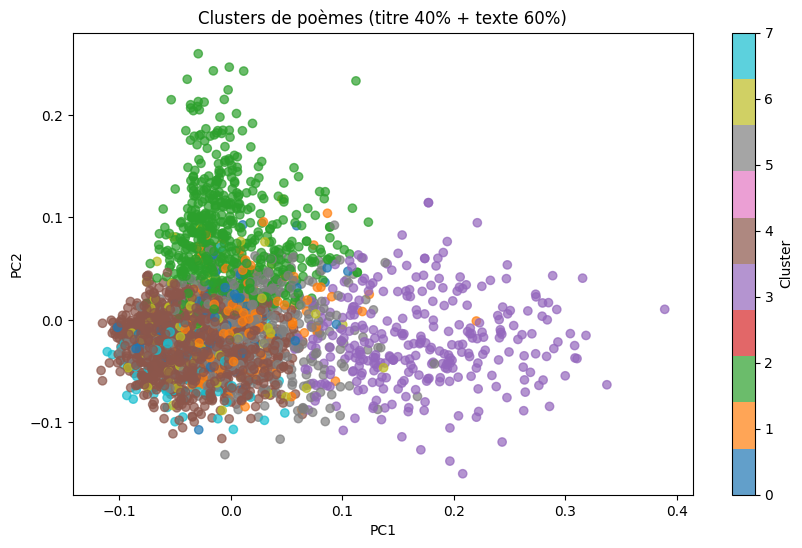

In [35]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_combined.toarray())

plt.figure(figsize=(10,6))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=data['cluster'], cmap='tab10', alpha=0.7)
plt.title("Clusters de poèmes (titre 40% + texte 60%)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()


In [37]:
import json
from sklearn.metrics.pairwise import cosine_similarity

# Charger lexiques
with open("../data/lexic/lexicons.json", "r", encoding="utf-8") as f:
    lexicons = json.load(f)

theme_words = {t: info["core_words"] + info["extended_words"] for t, info in lexicons.items()}
lex_corpus = [" ".join(words) for words in theme_words.values()]
lex_vectors = vectorizer_text.transform(lex_corpus)

# Comparer centres de clusters aux lexiques
for i in range(k):
    sims = {}
    for theme, vec in zip(theme_words.keys(), lex_vectors):
        sims[theme] = cosine_similarity(kmeans.cluster_centers_[i].reshape(1,-1), vec.reshape(1,-1))[0][0]
    sims_sorted = sorted(sims.items(), key=lambda x: x[1], reverse=True)
    print(f"\nCluster {i} ≈ {sims_sorted[0][0]} (score={sims_sorted[0][1]:.3f})")
    print("Top 3 thèmes :", sims_sorted[:3])


ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 7000 while Y.shape[1] == 5000

In [39]:
import json

with open("../data/lexic/lexicons.json", "r", encoding="utf-8") as f:
    lexicons = json.load(f)

# Fusionner core_words + extended_words
theme_words = {
    theme: info["core_words"] + info["extended_words"]
    for theme, info in lexicons.items()
}


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Corpus des lexiques
lex_corpus = [" ".join(words) for words in theme_words.values()]

# Corpus des poèmes
poem_corpus = data['clean_text'].tolist()

# Vectorisation commune
vectorizer = TfidfVectorizer(max_features=7000)
X_all = vectorizer.fit_transform(lex_corpus + poem_corpus)

# Séparer lexiques et poèmes
X_lex = X_all[:len(lex_corpus)]
X_poems = X_all[len(lex_corpus):]


In [41]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

similarities = cosine_similarity(X_poems, X_lex)
closest_theme_idx = np.argmax(similarities, axis=1)
closest_theme = [list(theme_words.keys())[i] for i in closest_theme_idx]

data['predicted_theme'] = closest_theme


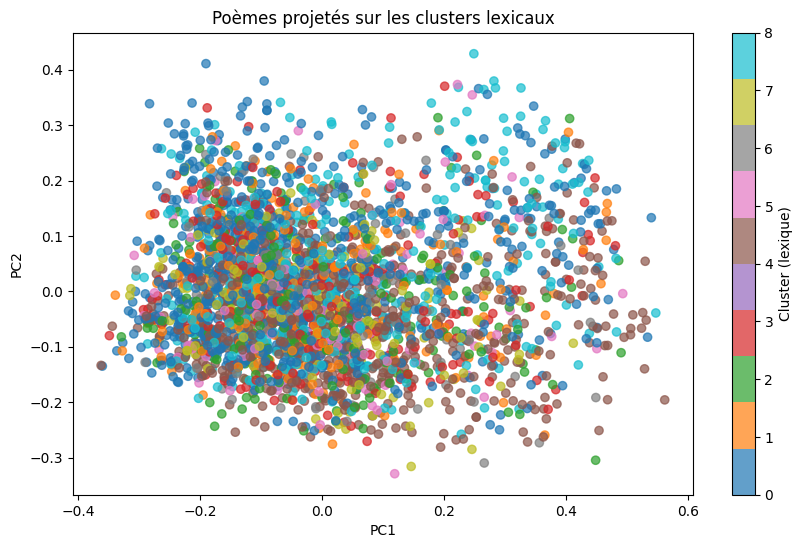

In [42]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_poems.toarray())

plt.figure(figsize=(10,6))
plt.scatter(X_reduced[:,0], X_reduced[:,1], 
            c=[closest_theme_idx], cmap='tab10', alpha=0.7)
plt.title("Poèmes projetés sur les clusters lexicaux")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster (lexique)")
plt.show()


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_poems, closest_theme, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


                       precision    recall  f1-score   support

      death_mortality       0.67      0.17      0.27        47
          joy_ecstasy       1.00      0.04      0.07        27
        love_romantic       0.45      0.85      0.58       181
 melancholy_nostalgia       1.00      0.12      0.21        51
       nature_sublime       0.47      0.70      0.56       140
       passion_erotic       0.00      0.00      0.00        29
       solitude_exile       1.00      0.03      0.06        30
spirituality_devotion       0.61      0.40      0.48        78
      time_transience       0.67      0.08      0.14        50

             accuracy                           0.48       633
            macro avg       0.65      0.27      0.27       633
         weighted avg       0.58      0.48      0.40       633



c:\users\utilisateur\3d objects\poeticmind\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\utilisateur\3d objects\poeticmind\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\utilisateur\3d objects\poeticmind\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [44]:
data.head()

,title,clean_text,lemmatized,title_clean,text_clean,predicted_theme,combined_text,cluster
0,A Song of Autumn,where shall we go for our garlands glad at the...,shall go garland glad falling year burn bank y...,song autumn,shall go garlands glad falling year burnt bank...,solitude_exile,song autumnsong autumn shall go garlands glad ...,6
1,An Exile's Farewell,the ocean heaves around us still with long and...,ocean heave around still long measure swell au...,exile's farewell,ocean heaves around us still long measured swe...,nature_sublime,exile's farewellexile's farewell ocean heaves ...,5
2,I Have A Rendezvous With Death,i have a rendezvous with death at some dispute...,I rendezvous death dispute barricade spring co...,rendezvous death,rendezvous death disputed barricade spring com...,death_mortality,rendezvous deathrendezvous death rendezvous de...,5
3,Ode in Memory of the American Volunteers Falle...,i ay it is fitting on this holiday commemorati...,I ay fitting holiday commemorative soldier dea...,ode memory american volunteers fallen france,ay fitting holiday commemorative soldier dead ...,nature_sublime,ode memory american volunteers fallen franceod...,5
4,Fragments,in that fair capital where pleasure crowned am...,fair capital pleasure crown amidst myriad cour...,fragments,fair capital pleasure crowned amidst myriad co...,love_romantic,fragmentsfragments fair capital pleasure crown...,5
